In [1]:

import numpy as np
import pandas as pd
import os


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from google.colab import drive

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Update the file paths
base_path = '/content/drive/MyDrive'  # Change this to the path where your data is stored on Google Drive



Mounted at /content/drive


In [8]:

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(base_path, 'Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(base_path, 'Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [9]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3274, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [28]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

**Testing**

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_34 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_36 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 12s 98ms/step - loss: 2.0566 - accuracy: 0.2946 - val_loss: 1.3571 - val_accuracy: 0.4034
Epoch 2/10
83/83 [==============================] - 8s 96ms/step - loss: 1.2140 - accuracy: 0.4455 - val_loss: 1.0987 - val_accuracy: 0.5424
Epoch 3/10
83/83 [==============================] - 8s 96ms/step - loss: 0.9942 - accuracy: 0.5560 - val_loss: 0.9099 - val_accuracy: 0.6237
Epoch 4/10
83/83 [==============================] - 8s 98ms/step - loss: 0.8611 - accuracy: 0.6375 - val_loss: 0.8187 - val_accuracy: 0.6373
Epoch 5/10
83/83 [==============================] - 8s 96ms/step - loss: 0.7747 - accuracy: 0.6767 - val_loss: 0.8236 - val_accuracy: 0.6136
Epoch 6/10
83/83 [==============================] - 8s 97ms/step - loss: 0.6690 - accuracy: 0.7269 - val_loss: 0.7291 - val_accuracy: 0.6508
Epoch 7/10
83/83 [==============================] - 8s 95ms/step - loss: 0.6006 - accuracy: 0.7510 - val_loss: 0.6417 - val_accuracy: 0.7051
Epoch 8/10
8

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

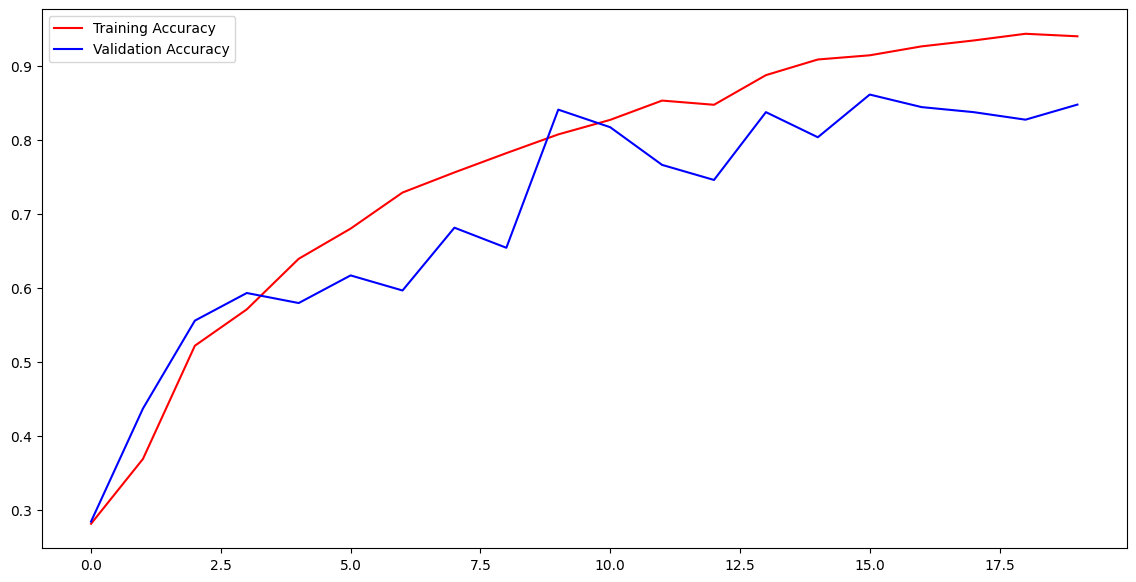

In [14]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

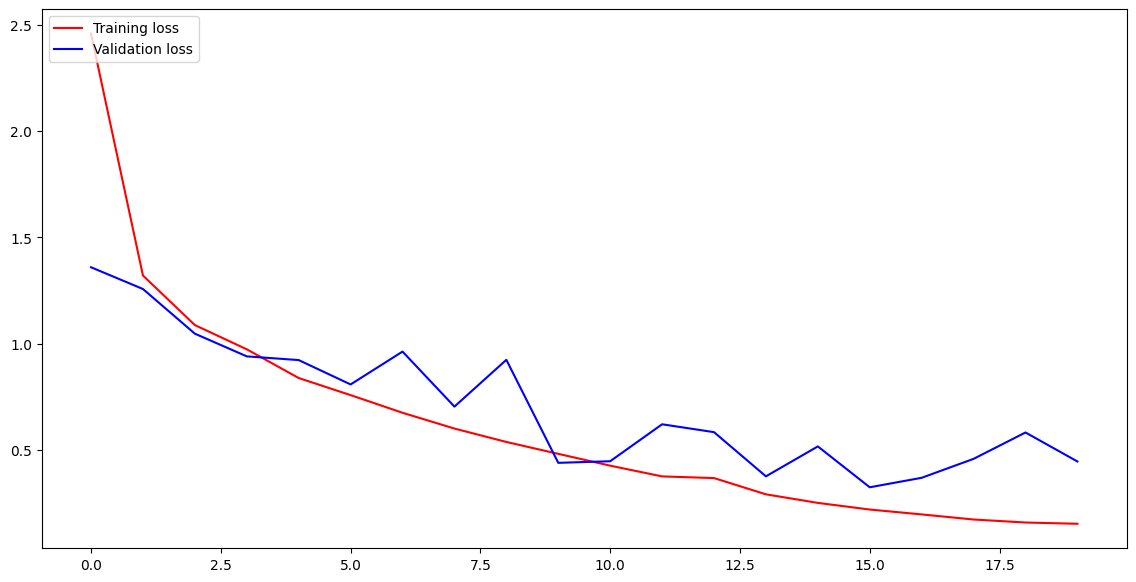

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [16]:
img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/image(18).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [17]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

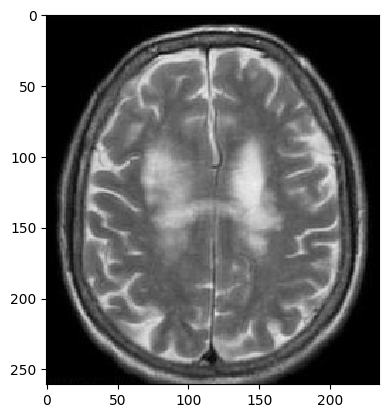

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Testing/no_tumor/image(18).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [19]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 438ms/step


2

In [27]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Get the current working directory
current_directory = os.getcwd()

# Print the directory where the model is saved
print("Model saved in directory:", current_directory)

Model saved in directory: /content


In [28]:
# Load the model from the native Keras format file
# model = keras.models.load_model('model.h5')
model = keras.models.load_model('model.h5')

a=model.predict(img_array)
indices = a.argmax()
indices

# Assuming you have some input data for prediction
# Replace 'input_data' with your actual input data
# input_data = np.array([[1, 2, 3, 4]])  # Example input data

# Perform prediction using the loaded model
# predictions = model.predict(img_array)

# Print the predictions
# print(predictions)

1/1 [==============================] - 0s 134ms/step


2

In [23]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import drive
import shutil


In [24]:
upload_widget = widgets.FileUpload()

# Display the file upload widget
display(upload_widget)

# Retrieve the uploaded file
uploaded_file = next(iter(upload_widget.value.values()))

# Define the destination path in Google Drive
destination_path = '/content/drive/MyDrive/UploadedImages/'

# Save the uploaded file to the destination path
with open(destination_path + uploaded_file['metadata']['name'], 'wb') as f:
    f.write(uploaded_file['content'])

# Print the image path
print("Image Path:", destination_path + uploaded_file['metadata']['name'])

FileUpload(value={}, description='Upload')

StopIteration: ignored

In [ ]:
drive.mount('/content/drive')

In [ ]:
uploaded_file = next(iter(upload_widget.value.values()))

    # Define the destination path in Google Drive
destination_path = '/content/drive/MyDrive/UploadedImages/'

In [ ]:
uploaded_file

In [ ]:
import os

destination_path = '/content/drive/MyDrive/UploadedImages/'

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a file upload widget
upload_widget = widgets.FileUpload()

# Display the file upload widget
display(upload_widget)

In [ ]:
if len(upload_widget.value) > 0:
    # Retrieve the uploaded file
    uploaded_file = next(iter(upload_widget.value.values()))

    # Save the uploaded file to the destination path
    with open(destination_path + uploaded_file['metadata']['name'], 'wb') as f:
        f.write(uploaded_file['content'])

    # Print the image path
    print("Image Path:", destination_path + uploaded_file['metadata']['name'])
else:
    print("No file uploaded.")

In [ ]:
img = cv2.imread(destination_path + uploaded_file['metadata']['name'])
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(destination_path + uploaded_file['metadata']['name'])
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
model = keras.models.load_model('model.keras')

a=model.predict(img_array)
indices = a.argmax()
indices